In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets,transforms

%matplotlib inline

In [17]:
train_data = datasets.MNIST(root='data',
train = True,
download=True,
transform=transforms.ToTensor())

test_data = datasets.MNIST(root='data',
train = False,
download=True,
transform=transforms.ToTensor())

In [33]:
print("train data: ", train_data, "\n\n")
print("test data: ", test_data)

train data:  Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 


test data:  Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


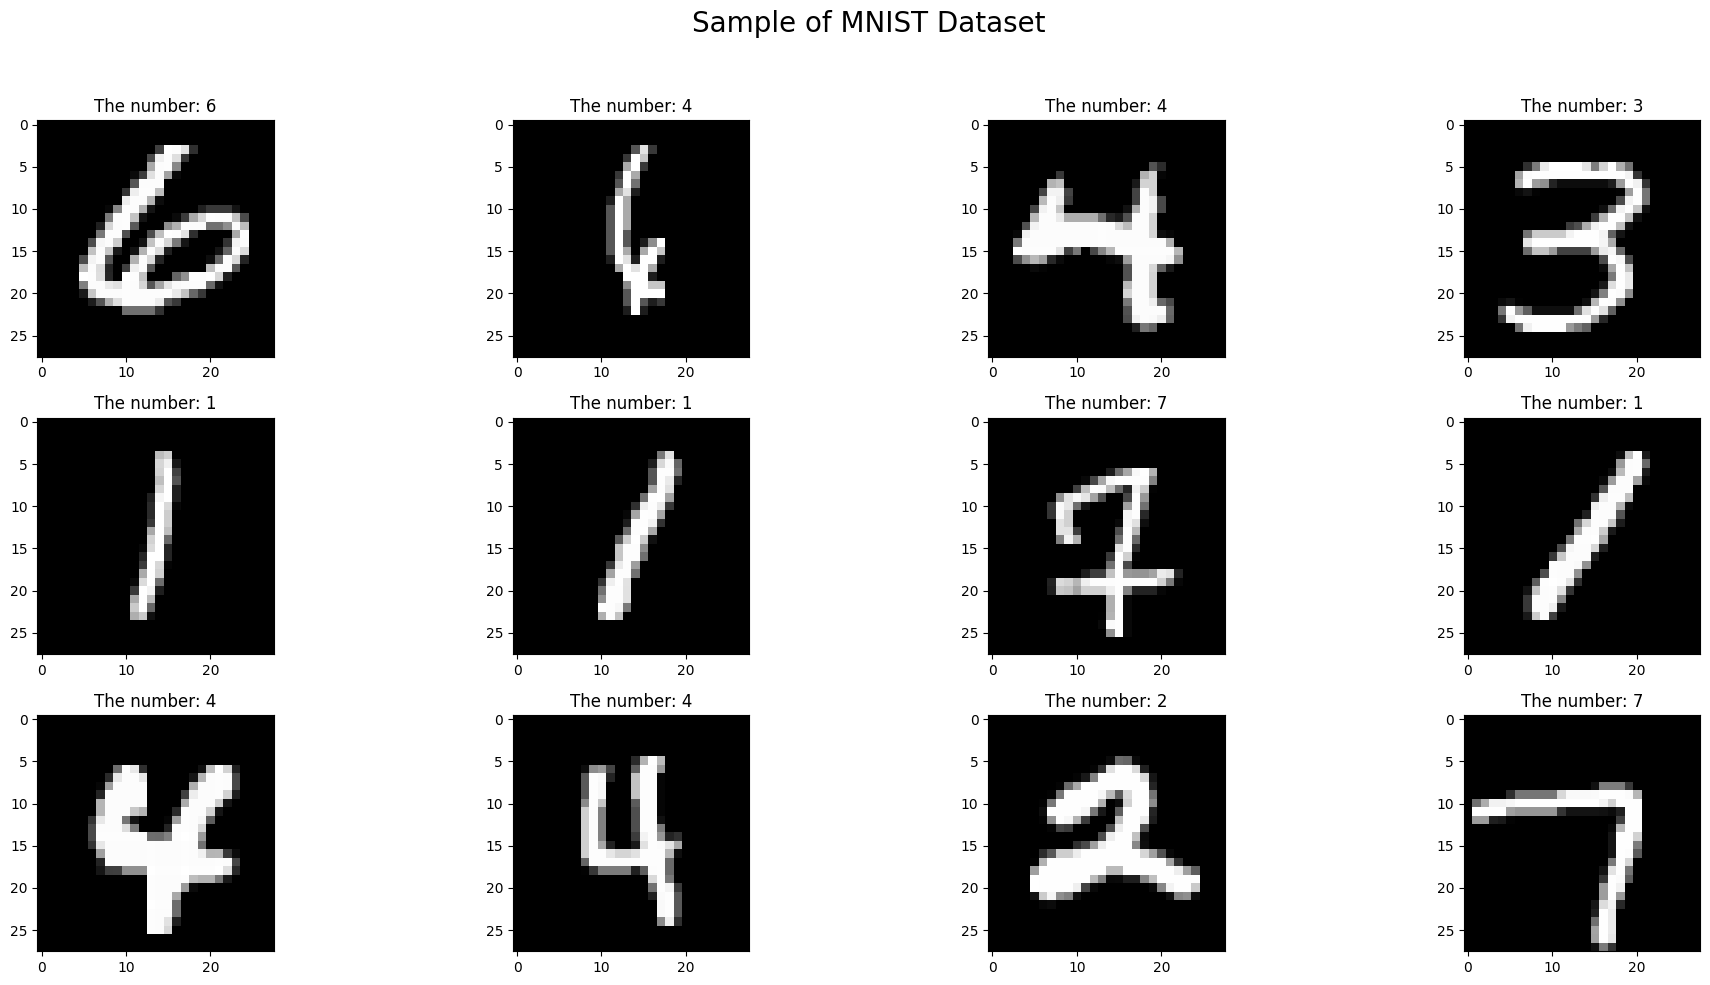

In [34]:
fig,axs = plt.subplots(3,4,figsize=(20,10))
for ax in axs.flatten():
  # pick a random image
  random_index = np.random.randint(0,high=60000)
  img, label = train_data[random_index]
  ax.imshow(img.numpy()[0], cmap='gray')
  ax.set_title(f'The number: {label}')

plt.suptitle('Sample of MNIST Dataset',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [38]:
train_data.data.shape
# dataset.data.unsqueeze(1).clone()

torch.Size([60000, 28, 28])

In [39]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super.__init__()
        